In [50]:
from Bio import Phylo
from Bio import SeqIO
from Bio import AlignIO

In [53]:
#import the sequences we will use. These are 16s sequences from GenBank
#example: https://www.ncbi.nlm.nih.gov/nuccore/FJ039971.1?report=genbank 
t1 = SeqIO.read("/home/satyam/MSA_Spike_Glycoprotein/final_sequences/bat_ratg13_spike_glycoprotein.fasta", "fasta")
t2 = SeqIO.read("/home/satyam/MSA_Spike_Glycoprotein/final_sequences/mers_spike_glycoprotein.fasta", "fasta")
t3 = SeqIO.read("/home/satyam/MSA_Spike_Glycoprotein/final_sequences/sars_spike_glycoprotein.fasta", "fasta")
t4 = SeqIO.read("/home/satyam/MSA_Spike_Glycoprotein/final_sequences/covid_spike_glycoprotein.fasta", "fasta")
t5 = SeqIO.read("/home/satyam/MSA_Spike_Glycoprotein/final_sequences/covid_india_spike_glycoprotein.fasta", "fasta")

In [54]:
# Combine all of the individual sequences into a new file 
phylo = SeqIO.write([t1,t2,t3,t4,t5], "phylo.fasta", "fasta")

In [56]:
# Open the alignment file as a MultipleSeqAlignment object 
with open("/home/satyam/MSA_Spike_Glycoprotein/final_sequences/clustalw.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
print(type(alignment))

<class 'Bio.Align.MultipleSeqAlignment'>


In [57]:
# Open and initiate the Distance Calculator using the Identity model 
from Bio.Phylo.TreeConstruction import DistanceCalculator 
calculator = DistanceCalculator('identity')

In [58]:
# Write the Distance Matrix 
distance_matrix = calculator.get_distance(alignment)
print(distance_matrix)

YP_009724390.1	0
QTV76175.1	0.0014716703458425018	0
QHR63300.2	0.02428256070640178	0.025018395879323085	0
YP_009825051.1	0.22958057395143483	0.23031640912435614	0.2236938925680647	0
YP_009047204.1	0.7336276674025018	0.7336276674025018	0.7350993377483444	0.7358351729212657	0
	YP_009724390.1	QTV76175.1	QHR63300.2	YP_009825051.1	YP_009047204.1


In [59]:
# Open and initiate the Tree Constructor 
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)

In [60]:
# Build the tree 
rbd_mutation_tree = constructor.build_tree(alignment)
rbd_mutation_tree.rooted = True
print(rbd_mutation_tree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner3')
        Clade(branch_length=0.012785136129507033, name='Inner2')
            Clade(branch_length=0.000459896983075761, name='YP_009724390.1')
            Clade(branch_length=0.0010117733627667408, name='QTV76175.1')
        Clade(branch_length=0.011129506990434149, name='QHR63300.2')
        Clade(branch_length=0.10034952170713755, name='Inner1')
            Clade(branch_length=0.6210448859455482, name='YP_009047204.1')
            Clade(branch_length=0.11479028697571747, name='YP_009825051.1')


In [61]:
# Save the tree to a new file 
Phylo.write(rbd_mutation_tree, "rbd_mutation_tree.xml", "phyloxml")

1

<Figure size 1296x720 with 0 Axes>

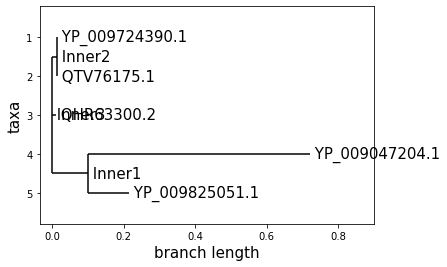

In [62]:
# Import matplotlib and create a basic tree 
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
fig = Phylo.draw(rbd_mutation_tree)

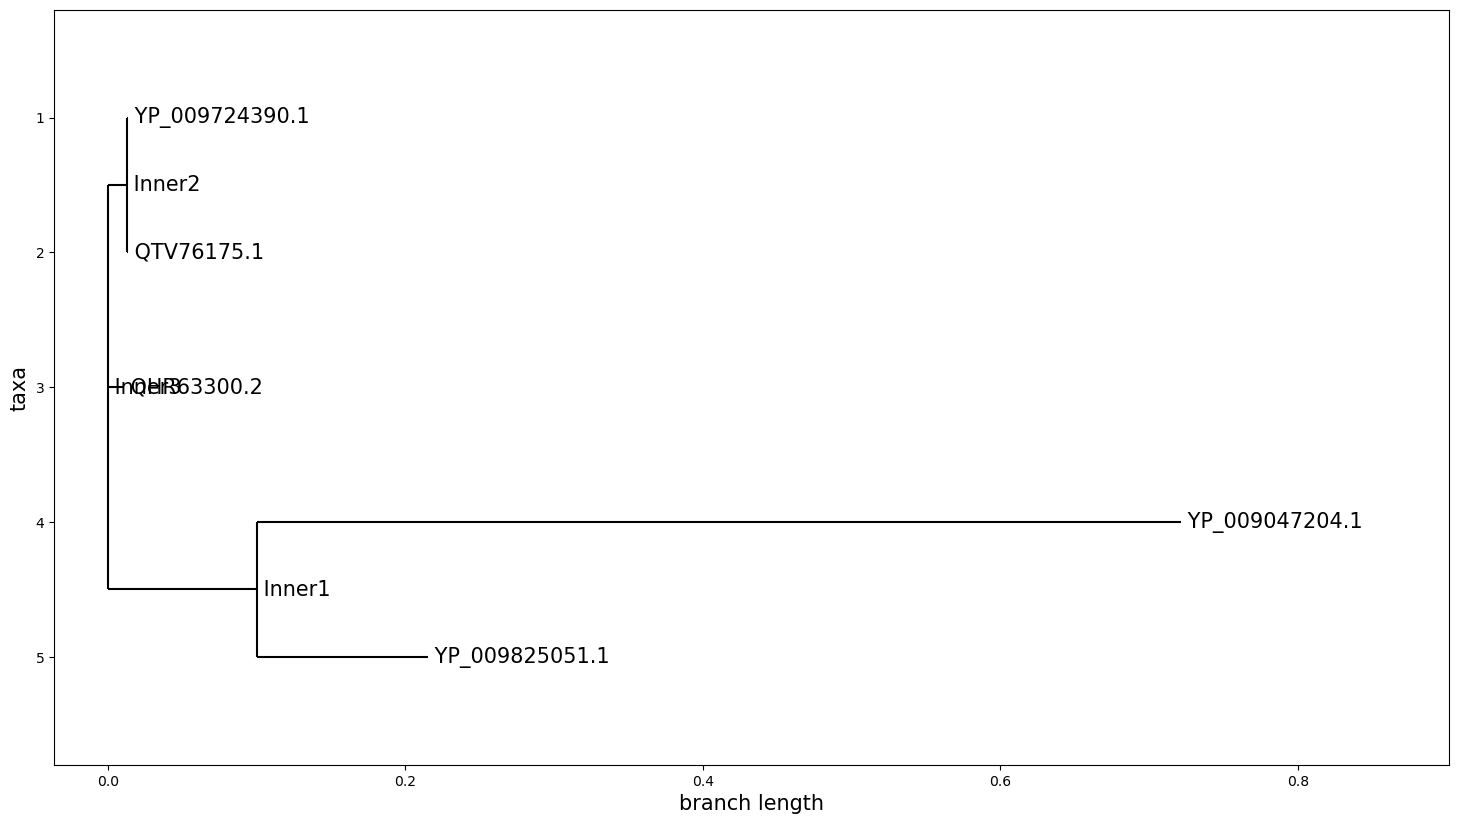

In [63]:
# Make a better looking tree using the features of matplotlib 
fig = plt.figure(figsize=(18, 10), dpi=100) # create figure & set the size 
matplotlib.rc('font', size=15)              # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=10)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=10)       # fontsize of the tick labels
#turtle_tree.ladderize()
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(rbd_mutation_tree, axes=axes)
#fig.savefig("rbd_mutation_cladogram")

In [64]:
import random
from ete3 import Tree, TreeStyle, NodeStyle, faces, AttrFace, CircleFace

def layout(node):
    if node.is_leaf():
        # Add node name to laef nodes
        N = AttrFace("name", fsize=14, fgcolor="black")
        faces.add_face_to_node(N, node, 0)
    if "weight" in node.features:
        # Creates a sphere face whose size is proportional to node's
        # feature "weight"
        C = CircleFace(radius=node.weight, color="RoyalBlue", style="sphere")
        # Let's make the sphere transparent
        C.opacity = 0.3
        # And place as a float face over the tree
        faces.add_face_to_node(C, node, 0, position="float")

def get_example_tree():
    # Random tree
    t = Tree("((((QTV76175.1,YP_009724390.1),QHR63300.2),YP_009825051.1),YP_009047204.1);")
    #t.populate(20, random_branches=True)

    # Some random features in all nodes
    for n in t.traverse():
        n.add_features(weight=random.randint(0, 50))

    # Create an empty TreeStyle
    ts = TreeStyle()

    # Set our custom layout function
    ts.layout_fn = layout

    # Draw a tree
    ts.mode = "c"

    # We will add node names manually
    ts.show_leaf_name = False
    # Show branch data
    ts.show_branch_length = True
    ts.show_branch_support = True

    return t, ts

if __name__ == "__main__":
    t, ts = get_example_tree()

    #t.render("bubble_map.png", w=600, dpi=300, tree_style=ts)
    t.show(tree_style=ts)